## STAT 301 Statistical Modelling for Data Science

### Assignment 4: Computational and Code
**Tran Anh Thu Phung - Group 27**

#### Import

In [1]:
library(tidyverse)
library(repr)
library(broom)
library(gridExtra)  
library(leaps)
library(moderndive)
library(grid)
library(lme4) 
library(knitr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




### 1. Data:
#### 1.1 Introduction

According to the World Health Organization (WHO), stroke is the second leading cause of death globally, responsible for approximately 11% of total deaths every year.

A stroke, often referred to as a "brain attack" is a medical emergency that occurs when blood flow to the brain is disrupted or blocked, leading to damage in brain cells due to the lack of oxygen and nutrients. This disruption can result from a blocked artery (ischemic stroke) or the rupture of a blood vessel (hemorrhagic stroke). Stroke can have severe and lasting effects on a person's abilities, impacting movement, speech, cognition, and more. Predicting the likelihood of experiencing a stroke involves understanding various risk factors, including lifestyle choices, medical history, and genetic predispositions, to create effective preventive strategies. 

This project uses the source of a dataset of Stroke prediction from an online website, Kaggle, and aims to explore and analyze these factors to develop a predictive model that can potentially assess an individual's risk of suffering from a stroke, enabling early intervention and proactive measures to mitigate this critical health concern.

#### 1.2 Loading the Stroke data

To read the dataset in R, we will read the dataset from the web into R.

I initially attempted to load the stroke daatset from the original source on the web, Kaggle, but there was no direct access to `csv.` file. To solve this problem, I have downloaded the dataset and uploaded it onto a public GitHub repository, from which we were able to access it from Jupyter Notebook.

In [2]:
url <- "https://raw.githubusercontent.com/Wendy1907/STAT_301_Stroke_Prediction_project/main/healthcare-dataset-stroke-data.csv"
df <- read_csv(url)
head(df)

Rows: 5110 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): gender, ever_married, work_type, Residence_type, bmi, smoking_status
dbl (6): id, age, hypertension, heart_disease, avg_glucose_level, stroke

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1


#### 1.3 Data Summary

The dataset was collected from many hospitals of Bangladesh in the year of 2019, based on patient's various health conditions, which is in the occurrence of stroke disease.

There are total **5110 observations** and **12 different variables** in this dataset.

| Variable Name      | Type of Variable | Explanation |
| ----------- | :-----------: | ----------- |
| `id`     | dbl       | Unique identifier for each patient |
| `gender`   | chr        | Patient's gender, such as `"Male"`, `"Female"`, or `"Other"`|
| `age`   | dbl        | Age of the patient |
| `hypertention`   | dbl        | Binary feature, `0` if the patient does not have hypertension, `1` if the patient has hypertension|
| `heart_disease`   | dbl        | Binary feature, `0` if the patient does not have heart disease, `1` if the patient have heart disease|
| `ever_married`   | chr        | Binary feature, `"No"` if the patient never married, and`"Yes"` if the patient have already married|
| `work_type`   | chr        | Patient's current occupation|
| `Residence_type`   | chr        | Patient's residence type|
| `avg_glucose_level`   | dbl        | Patient's average glucose level in blood|
| `bmi`   | chr        | Patient's body mass index with missing value `N/A`|
| `smoking_status`   | chr        | Patient's smoking status with missing value `Unknown`|
| `stroke`   | dbl        | Binary feature, `0` if the patient had not have a stroke and `1` if had |

### 2. Question:

According to the research in 2022, "age, heart disease,
average glucose level, and hypertension are the most important factors for detecting stroke in patients." (Dev et al. 100032). Additionally, considering smoking habits, a "generally acknowledged" contributor to strokes, alongside body mass index and gender, provides valuable factors for me to utilized to make predictions regarding stroke occurrences (Shah and Cole 917).

It leads to my key question:

>**"Is it possible to forecast an individual's likelihood of experiencing a stroke by analyzing factors such as age, hypertension, heart disease presence, average glucose level, BMI, smoking habits, and gender? Additionally, can we pinpoint the most influential risk factors contributing to stroke occurrences?"**

### 3. Cleaning and Wrangling the dataset:

#### 3.1 Cleaning the dataset

**3.1.1 Finding Null variables**

First, we have to check if the data contains any null or N/A value or not.

- BMI:

In [3]:
length(which(df$bmi == "N/A"))

[1] 201

The funcion `is.na` which whill identify the null value giving out the result that there is no null variables in our dataset. However, if we take a better look inside the data, we can see that there is 201 variables contains `N/A` values in `bmi` columns. Then, to deal with these null variables, we decided to drop them from the dataset.

In [4]:
df <- df[!(df$bmi == "N/A"),]

- Gender:

In [5]:
length(which(df$gender == "Other"))

[1] 1

In here, we spotted that there is one value `Other` in the `gender` columns, then, we decided to remove it from the dataset.

In [6]:
df <- df[!(df$gender == "Other"),]

- Smoking Status:

In [7]:
table(df$smoking_status)


formerly smoked    never smoked          smokes         Unknown 
            836            1852             737            1483 

In the `smoking_status` column, we can see that there is a large portion of `Unknown` variable in this data set, however, since the size is large, we can not drop this values and treat it as same as what we have done above, instead, we decided to keep them and treat it as one of the type inside smoking status.

**3.1.2 Finding duplicate values**

Next step, we are going to check whether the data have duplicate value or not.

In [8]:
sum(duplicated(df))

[1] 0

In this dataset, we can see that there is no duplicate value.

**3.1.3 Convert variables type**

As we can see that the `bmi` conlumn contains numeric value, however, the column type is `chr` so wee need to change the column type for `bmi`. Moreover, since the `stroke`, `hypertension`, `heart_disease` column have binary values which represent if that patient having those health issues or not, then, we change those columns type into factor.

In [9]:
df_cleaned <- df %>%
mutate (bmi = as.numeric(bmi), 
        stroke = factor(stroke),
       hypertension = factor(hypertension),
        heart_disease = factor(heart_disease))

Then, we have got a clean dataset. The clean dataset that we have gained is contain total of **4908 observations and 12 different columns**.

In [10]:
head(df_cleaned)

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<chr>,<dbl>,<fct>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<fct>
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


**3.2 Wrangling the Stroke Prediction data**

Since our question focus on factors such as `age`, `hypertension`, `heart_disease`, `avg_glucose_level`, `bmi`, `smoking_status`,`gender`, and the target `stroke`, then we only interested in those columns to predict the likelihood of experiencing a stroke.

In [11]:
data <- df_cleaned %>%
select(age, hypertension, heart_disease, avg_glucose_level, bmi, smoking_status, gender, stroke)
head(data)

age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender,stroke
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<fct>
67,0,1,228.69,36.6,formerly smoked,Male,1
80,0,1,105.92,32.5,never smoked,Male,1
49,0,0,171.23,34.4,smokes,Female,1
79,1,0,174.12,24.0,never smoked,Female,1
81,0,0,186.21,29.0,formerly smoked,Male,1
74,1,1,70.09,27.4,never smoked,Male,1


### 4. Exploratory Data Analysis:

We perform an explanatory data analysis on the stroke dataset to summarize the main characteristics and to get a better understanding of the data.

First, we will explore the detail information of the continuous variables inside of the data.

In [12]:
data_cont <- data %>% select(age, avg_glucose_level, bmi)
head(data_cont)

age,avg_glucose_level,bmi
<dbl>,<dbl>,<dbl>
67,228.69,36.6
80,105.92,32.5
49,171.23,34.4
79,174.12,24.0
81,186.21,29.0
74,70.09,27.4


In [13]:
summary(data_cont)

      age        avg_glucose_level      bmi       
 Min.   : 0.08   Min.   : 55.12    Min.   :10.30  
 1st Qu.:25.00   1st Qu.: 77.07    1st Qu.:23.50  
 Median :44.00   Median : 91.68    Median :28.10  
 Mean   :42.87   Mean   :105.30    Mean   :28.89  
 3rd Qu.:60.00   3rd Qu.:113.50    3rd Qu.:33.10  
 Max.   :82.00   Max.   :271.74    Max.   :97.60  

Since we are planning to forecast an individual's likelihood of experiencing a stroke by analyzing factors such as age, hypertension, heart disease presence, average glucose level, BMI, smoking habits, and gender, then we want to explore the relationship between those factors. Those boxplots will compare the differences between people who had experienced stroke and those who haven't through categorical factors `gender`, `hypertension`, `heart_disease`, `smoking_status`, and continuous variables `age`, `avg_glucose_level`, `bmi`, with additional infomation of mean and IQR show on plots.

In [14]:
plot1  <- data %>%
ggplot(aes(x = gender, y = age, color = stroke)) + 
geom_boxplot() +
xlab("Gender") + 
ylab("Age") + 
ggtitle("Stroke and Age Across Gender") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(gender, age, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot2  <- data %>%
ggplot(aes(x = hypertension, y = age, color = stroke)) + 
geom_boxplot() +
xlab("Hypertension") + 
ylab("Age") + 
ggtitle("Stroke and Age Across Hypertension") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(hypertension, age, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot3  <- data %>%
ggplot(aes(x = heart_disease, y = age, color = stroke)) + 
geom_boxplot() +
xlab("Heart Disease") + 
ylab("Age") + 
ggtitle("Stroke and Age Across Heart Disease") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(heart_disease, age, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot4  <- data %>%
ggplot(aes(x = smoking_status, y = age, color = stroke)) + 
geom_boxplot() +
xlab("Smoking Status") + 
ylab("Age") + 
ggtitle("Stroke and Age Across Smoking Status") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(smoking_status, age, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

In [15]:
plot5  <- data %>%
ggplot(aes(x = gender, y = avg_glucose_level, color = stroke)) + 
geom_boxplot() +
xlab("Gender") + 
ylab("Average Glucose Level") + 
ggtitle("Stroke and Average Glucose Level Across Gender") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(gender, avg_glucose_level, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot6  <- data %>%
ggplot(aes(x = hypertension, y = avg_glucose_level, color = stroke)) + 
geom_boxplot() +
xlab("Hypertension") + 
ylab("Average Glucose Level") + 
ggtitle("Stroke and Average Glucose Level Across Hypertension") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(hypertension, avg_glucose_level, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot7  <- data %>%
ggplot(aes(x = heart_disease, y = avg_glucose_level, color = stroke)) + 
geom_boxplot() +
xlab("Heart Disease") + 
ylab("Average Glucose Level") + 
ggtitle("Stroke and Average Glucose Level Across Heart Disease") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(heart_disease, avg_glucose_level, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot8  <- data %>%
ggplot(aes(x = smoking_status, y = avg_glucose_level, color = stroke)) + 
geom_boxplot() +
xlab("Smoking Status") + 
ylab("Average Glucose Level") + 
ggtitle("Stroke and Average Glucose Level Across Smoking Status") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(smoking_status, avg_glucose_level, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

In [16]:
plot9  <- data %>%
ggplot(aes(x = gender, y = bmi, color = stroke)) + 
geom_boxplot() +
xlab("Gender") + 
ylab("BMI") + 
ggtitle("Stroke and BMI Across Gender") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(gender, bmi, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot10  <- data %>%
ggplot(aes(x = hypertension, y = bmi, color = stroke)) + 
geom_boxplot() +
xlab("Hypertension") + 
ylab("BMI") + 
ggtitle("Stroke and BMI Across Hypertension") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(hypertension, bmi, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot11  <- data %>%
ggplot(aes(x = heart_disease, y = bmi, color = stroke)) + 
geom_boxplot() +
xlab("Heart Disease") + 
ylab("BMI") + 
ggtitle("Stroke and BMI Across Heart Disease") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(heart_disease, bmi, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot12  <- data %>%
ggplot(aes(x = smoking_status, y = bmi, color = stroke)) + 
geom_boxplot() +
xlab("Smoking Status") + 
ylab("BMI") + 
ggtitle("Stroke and BMI Across Smoking Status") +
theme(plot.title = element_text(size=8)) +
stat_summary(aes(smoking_status, bmi, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

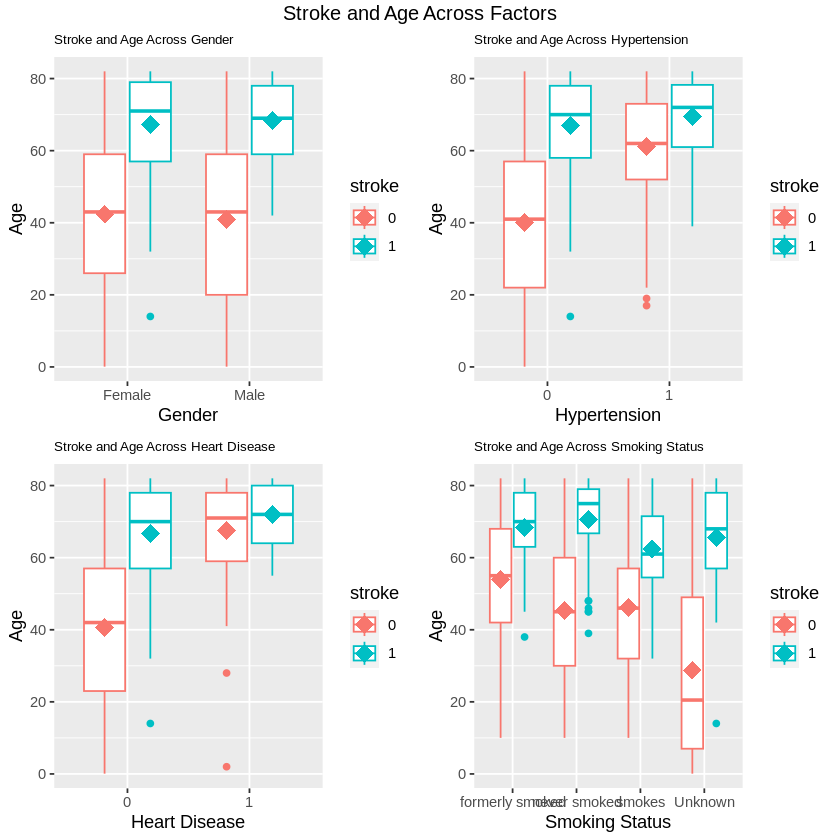

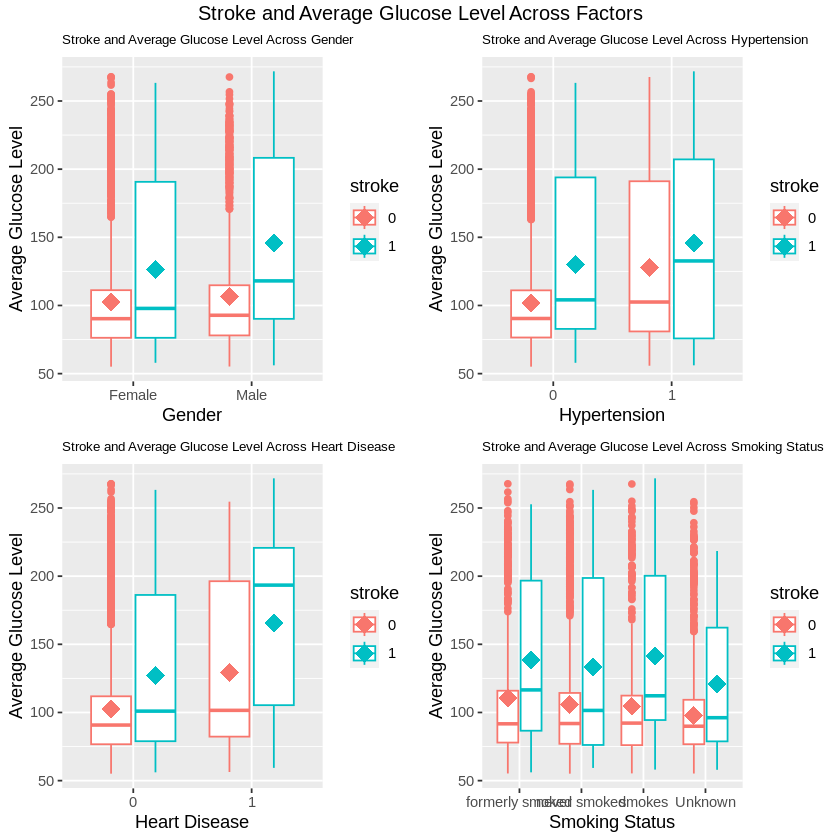

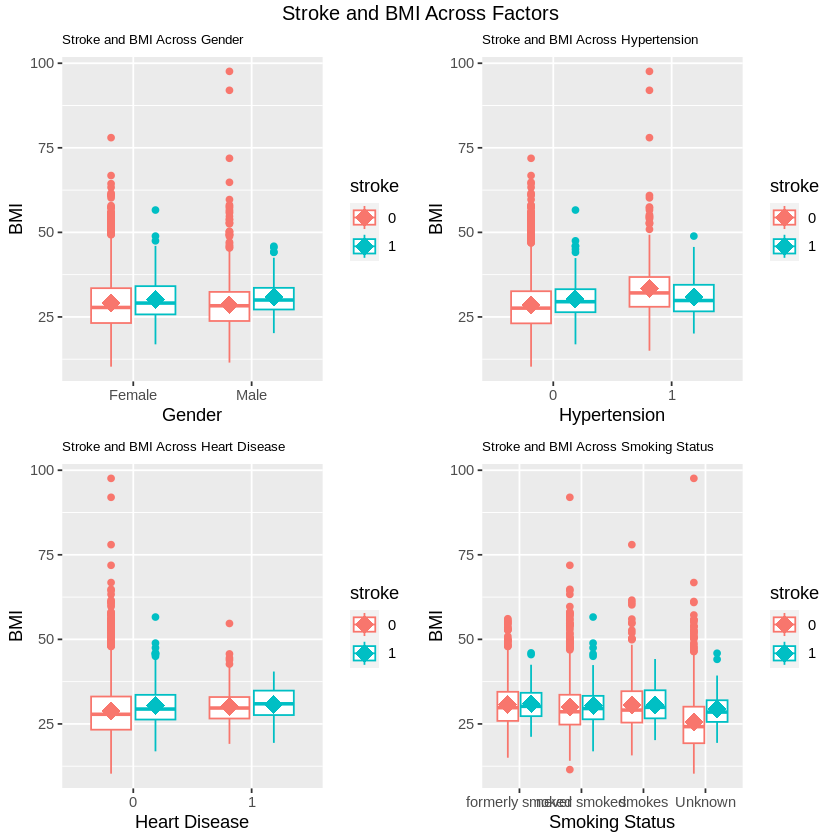

In [17]:
grid.arrange(plot1,plot2,plot3,plot4, ncol=2, nrow=2, top = "Stroke and Age Across Factors") 
grid.arrange(plot5,plot6,plot7,plot8, ncol=2, nrow=2, top = "Stroke and Average Glucose Level Across Factors") 
grid.arrange(plot9,plot10,plot11,plot12, ncol=2, nrow=2,  top = "Stroke and BMI Across Factors")

Based on the boxplots above, we have gained some outstanding results:
- **Stroke and Age Across Factors**: Across all levels within each categorical variable, individuals who have experienced a stroke tend to be older. Moreover, those patients who have a history of hypertension and heart disease are generally older compared to those without these conditions. Notably, among individuals who still smoke, those who have experienced a stroke tend to be younger on average compared to those who have experienced a stroke but quit or never smoked.
- **Stroke and Average Glucose Level Across Factors**: The boxplots illustrate that the distribution of average glucose levels is right-skewed. The interquartile range (IQR) and mean tend to be notably higher for individuals who have had a stroke.
- **Stroke and BMI Across Factors**: In contrast to the two continuous variables mentioned above, there are minimal differences in the mean and IQR of BMI between individuals who have experienced a stroke and those who have not. Furthermore, there are more outliers in the BMI distribution for individuals without a stroke, contributing to a right-skewed distribution in this group.

### 5. Methods and Plan:

In the realm of healthcare analytics, predicting and understanding the likelihood of stroke occurrence is a critical endeavor. The dataset under consideration includes various factors such as age, hypertension, heart disease presence, average glucose level, BMI, smoking habits, and gender. To address the overarching question of forecasting an individual's propensity for stroke and identifying influential risk factors, the **binary logistic regression** method is proposed as an appropriate analytical tool.

**Why is this method appropriate?**

**Binary logistic regression** is tailored for scenarios where there are two possible outcomes, precisely fitting our situation where it requires to predict the outcome of having stroke or not. The explanatory variables like age, hypertension, heart disease presence, average glucose level, BMI, smoking habits, and gender, have both types of categorical and numeric. Then, for this problem logistic regression is the most appropriate model to predict the likelihood of stroke.

**Assumption**

Logistic regression assumes that the relationship between the predictors and the log odds of the outcome is linear. This requires consideration while interpreting the coefficients for each predictor. Additionally, while not explicitly stated, the assumption of independence of observations is essential. Each data point in the dataset should be ideally independent of others, ensuring the model's reliability.

To apply binary logistic regression to the stroke prediction dataset, the explanatory variables need to be appropriately encoded and prepared for analysis. Categorical variables like gender and smoking habbits may need to be converted into numerical representation (for example, in `gender` 0 for male and 1 for female). Once the dataset is prepared, logistic regression models can be built to estimate the coefficients of the predictors variables and their impact on the log odds of stroke occurrence.

**Limitations and Weakness**

One significant setback arises from the dataset itself concerning the `smoking status`. It contains toatl of 1483 `unknown` values, which is too substantial in our case to sumply drop. This discrepancy might affect the predictions, potentially impacting our choosen method's performance.

Another notable limitation is that logistic regression's assumption of linear relationship between the predictors and the log odds of the outcome. If the true result is not linear, the model might not provide an accurate representation. Moreover, it assumes independence of observation, which might not always hold in real-world data. Also, if there are some significant outliers in the dataset, the model's predictions can be heavily impacted.

Nevertheless, despite these limitations, binary logistic regression remains fitting for this dataset due to its ability to handle binary outcomes and multiple predictors. By effectively modeling the relationship between these predictors and stroke occurrences, it facilitates the identification of the most influential risk factors, enabling better understanding and potentially aiding in preventive healthcare strategies.

### 6. Implementation of a proposed model:


Based on the proposed **binary logistic model** that I have list above, we will implement this model for our dataset.

In [18]:
model <- glm(stroke ~ age + hypertension + heart_disease + avg_glucose_level + bmi + smoking_status + gender,
             data = data, family = binomial)
summary(model)


Call:
glm(formula = stroke ~ age + hypertension + heart_disease + avg_glucose_level + 
    bmi + smoking_status + gender, family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0751  -0.2958  -0.1573  -0.0734   3.6706  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -7.823945   0.588335 -13.298  < 2e-16 ***
age                         0.069041   0.005846  11.810  < 2e-16 ***
hypertension1               0.517649   0.174433   2.968 0.003001 ** 
heart_disease1              0.372836   0.206067   1.809 0.070405 .  
avg_glucose_level           0.004697   0.001289   3.644 0.000268 ***
bmi                         0.003458   0.011744   0.294 0.768426    
smoking_statusnever smoked -0.057792   0.187965  -0.307 0.758493    
smoking_statussmokes        0.321264   0.228501   1.406 0.159736    
smoking_statusUnknown      -0.256978   0.245238  -1.048 0.294697    
genderMale                

Then, we will use the table to represent the result above.

In [19]:
model_results  <-
    tidy(model) %>% 
    mutate(exp.estimate = exp(estimate)) %>% 
    mutate_if(is.numeric, round, 3)

model_results

term,estimate,std.error,statistic,p.value,exp.estimate
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.824,0.588,-13.298,0.000,0.000
age,0.069,0.006,11.810,0.000,1.071
hypertension1,0.518,0.174,2.968,0.003,1.678
heart_disease1,0.373,0.206,1.809,0.070,1.452
avg_glucose_level,0.005,0.001,3.644,0.000,1.005
bmi,0.003,0.012,0.294,0.768,1.003
smoking_statusnever smoked,-0.058,0.188,-0.307,0.758,0.944
smoking_statussmokes,0.321,0.229,1.406,0.160,1.379
smoking_statusUnknown,-0.257,0.245,-1.048,0.295,0.773


This logistic regression model explores the association between various factors (age, hypertension, heart disease, average glucose level, BMI, smoking status, and gender) and the likelihood of stroke occurrence. The age, having hypertension and heart disease, and also smoking status shows a significant with stroke risk. However, BMI, gender, average glucose level don't appear to significantly impact stroke likelihood in this model. 

An unexpected result is the non-significant impact of BMI, average glucose level, gender on stroke risk, which might warrant further investigation into potential confounding variables or interactions not accounted for in the current model. Possible ways to address this could involve exploring higher-order interactions, considering other relevant variables, or assessing the data quality for these specific variables.

### 7. References:
- Dev, Soumyabrata, et al. “A predictive analytics approach for stroke prediction using machine learning and Neural Networks.” Healthcare Analytics, vol. 2, 2022, p. 100032, https://doi.org/10.1016/j.health.2022.100032. 
- Fedesoriano. “Stroke Prediction Dataset.” Kaggle, 26 Jan. 2021, www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset. 
- Shah, Reena S, and Cole, John W. “Smoking and stroke: The more you smoke the more you stroke.” Expert Review of Cardiovascular Therapy, vol. 8, no. 7, 2010, pp. 917–932, https://doi.org/10.1586/erc.10.56. 